In [ ]:
#Data Preprocessing and Augmentation.ipynb

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)

test_datagen = ImageDataGenerator(rescale=1./255)

def load_data(directory, annotations):
    images = []
    labels = []
    for index, row in annotations.iterrows():
        img_path = os.path.join(directory, row['filename'])
        if os.path.exists(img_path):
            img = tf.keras.preprocessing.image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            images.append(img_array)
            labels.append(row['class'])
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Load and preprocess training, validation, and test data

train_images, train_labels = load_data(train_dir, train_annotations)
valid_images, valid_labels = load_data(valid_dir, valid_annotations)
test_images, test_labels = load_data(test_dir, test_annotations)

In [ ]:
# Convert labels to categorical using the combined label map

train_labels = np.array([label_map[label] for label in train_annotations['class']])
valid_labels = np.array([label_map[label] for label in valid_annotations['class']])
test_labels = np.array([label_map[label] for label in test_annotations['class']])

train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=len(label_names))
valid_labels = tf.keras.utils.to_categorical(valid_labels, num_classes=len(label_names))
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=len(label_names))

In [ ]:
# Plot sample images from the training set

def plot_images(images, labels, label_names, num_images=16):
    plt.figure(figsize=(12, 12))
    for i in range(num_images):
        index = random.randint(0, len(images) - 1)
        plt.subplot(4, 4, i+1)
        plt.imshow(images[index].astype('uint8'))
        plt.title(label_names[np.argmax(labels[index])])
        plt.axis('off')
    plt.show()

plot_images(train_images, train_labels, label_names)

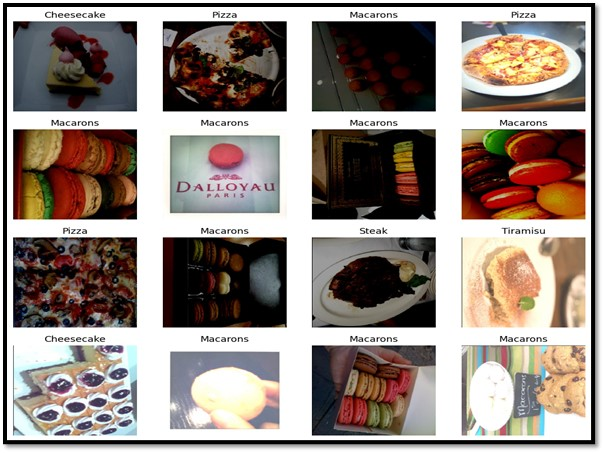